In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as keras
from keras.models import Sequential
from keras.models import load_model

In [2]:
df = pd.read_csv('DATA/Admission_Predict.csv')
df = df.drop(columns=['Serial No.'])
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


# Hiển thị dataset

<Axes: >

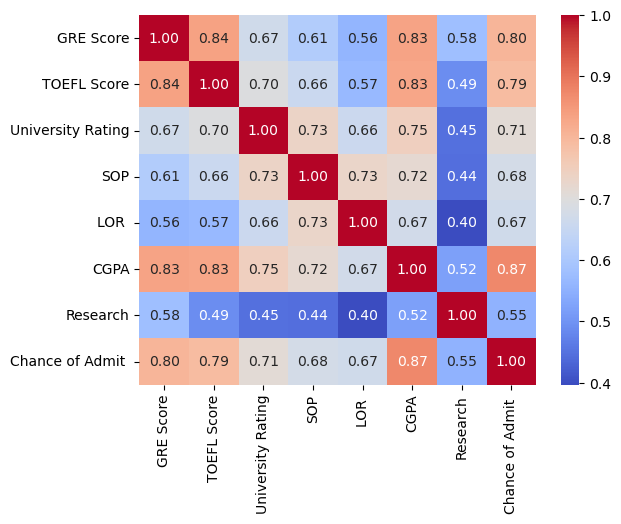

In [4]:
import seaborn as sns
# Hiển thị dataset
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True, fmt='.2f',
            cmap='coolwarm')

# Tạo model

In [6]:
from keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential(name = "Regression_Model")
model.add(Dense(8,# khai báo số lượng neuron trong lớp đầu tiên
                input_shape=(7,), # khai báo kích thước đầu vào (có 7 biến đầu vào) phải có dấy phẩy (,) để python hiểu đây là tuple 
                activation='relu', # hàm kích hoạt của lớp đầu tiên
                )) # lớp đầu tiên của mô hình, thường là lớp Dense (fully connected layer)
# nếu input  chỉ có 1 chiều thì bắt buộc phải để trống giá trị thứ 2 của tuple (kích thước đầu vào, )
# activation :'relu', 'sigmoid', 'tanh', 'softmax', 'linear',... 
model.add(Dense(3, activation='relu')) # lớp thứ 2 có 3 neuron
model.add(Dense(1, activation='linear')) # lớp đầu ra có 1 neuron
# thiết lập thông số cho mô hình
model.compile(optimizer='adam',# thuật toán tối ưu để cập nhật trọng số của mô hình
              loss='mean_squared_error'# hàm mất mát để đánh giá độ chính xác của mô hình
              ) # biên dịch mô hình
# compile: dùng để thiết lập hàm loss, optimizer, metrics cho mô hình
# optimizer: 'adam', 'sgd', 'rmsprop', 'adagrad',...
model.summary() # hiển thị thông tin mô hình

Model: "Regression_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (380.00 B)

 Trainable params: 95 (380.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# tách dữ liệu thành tập huấn luyện và tập kiểm tra
x = df.drop(columns=['Chance of Admit ']) # biến đầu vào
y = df['Chance of Admit '] # biến đầu ra

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)
x_train


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() # khởi tạo bộ chuẩn hóa MinMax dùng để chuẩn hóa dữ liệu về khoảng [0, 1]
x_train = scaler.fit_transform(x_train) # chuẩn hóa dữ liệu huấn luyện
x_test = scaler.transform(x_test) # chuẩn hóa dữ liệu kiểm tra

In [ ]:
x_train

array([[0.64      , 0.64285714, 0.5       , ..., 0.375     , 0.59935897,
        1.        ],
       [0.56      , 0.64285714, 0.5       , ..., 0.5       , 0.64102564,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.875     , 0.99679487,
        1.        ],
       ...,
       [0.32      , 0.46428571, 0.25      , ..., 0.5       , 0.45512821,
        1.        ],
       [0.24      , 0.25      , 0.        , ..., 0.25      , 0.14423077,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.625     , 0.46474359,
        0.        ]])

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

history = model.fit(x=x_train, 
                    y=y_train,
                    epochs=50, # số lần lặp lại huấn luyện
                    batch_size=32, # kích thước lô dữ liệu
                    steps_per_epoch=200, # số bước huấn luyện trong mỗi epoch
                    validation_data=(x_test, y_test), # dữ liệu kiểm tra
                    verbose=1 # hiển thị thông tin huấn luyện
                    ) # huấn luyện mô hình

x_train shape: (320, 7)
y_train shape: (320,)
Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.0101 - val_loss: 0.0090
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 0.0100 - val_loss: 0.0089
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 0.0100 - val_loss: 0.0089


c:\Users\MSII\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
c:\Users\MSII\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 0.0098 - val_loss: 0.0087
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.0097 - val_loss: 0.0087
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 0.0095 - val_loss: 0.0086
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 0.0095 - val_loss: 0.0085
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 0.0094 - val_loss: 0.0085
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 0.0094 - val_loss: 0.0084
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 0.0093 - val_loss: 0.0083
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 0.0091 - val_loss: 0.0083
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 0.0090 - val_loss: 0.0082
Epoch 13/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 0.0090 - val_loss: 0.0081
Epoch 14/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 0.0089 - val_loss: 0.0080
Epoch 15/50
200/200 ━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


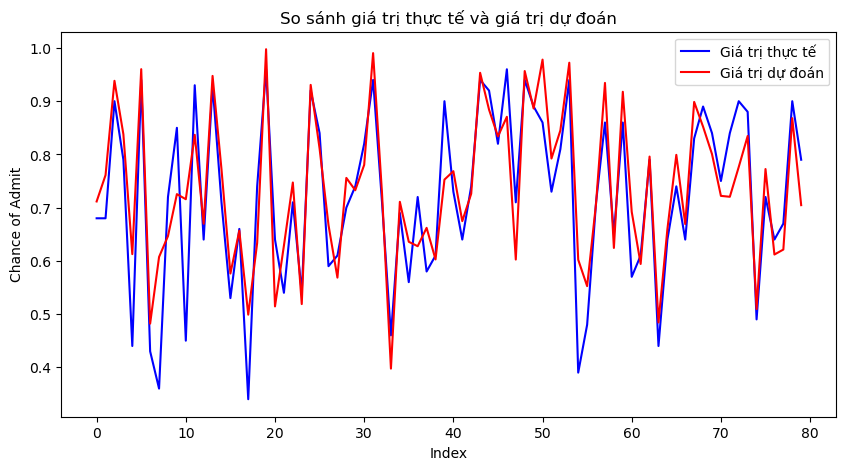

In [ ]:
# đánh giá mô hình trên tập kiểm tra
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test) # dự đoán trên tập kiểm tra

# biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Giá trị thực tế', color='blue')
plt.plot(y_pred, label='Giá trị dự đoán', color='red')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.xlabel('Index')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# tính toán độ chính xác của mô hình
print('r_squared score:', r2_score(y_test, y_pred))
# độ chính xác của mô hình trên tập kiểm tra
train_predict = model.predict(x_train)
print('Train r_squared score:', r2_score(y_train, train_predict))


r_squared score: 0.7480638621806583
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train r_squared score: 0.6506848155554676


In [ ]:
accuracy = model.evaluate(x_test, y_test, verbose=0)
print('tính toán loss:', accuracy)

tính toán loss: 0.006505837198346853


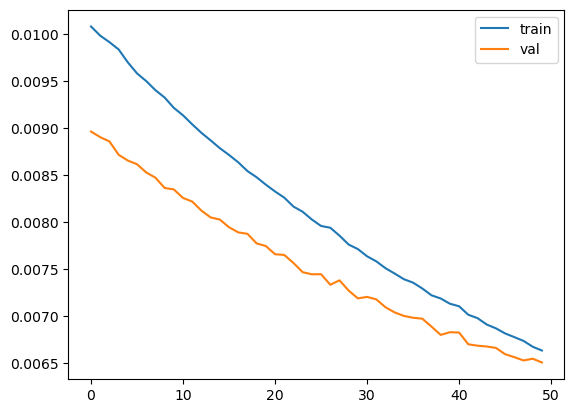

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
